In [39]:
# Scenario Question: Predicting Titanic Survival
# Researchers are studying the Titanic disaster and want to build models that predict whether a
#  passenger would survive or not survive based on their information.
# - Features used:
# - Passenger class (pclass)
# - Gender (sex)
# - Age (age)
# - Number of siblings/spouses aboard (sibsp)
# - Number of parents/children aboard (parch)
# - Ticket fare (fare)
# - Label:
# - 1 = Survived
# - 0 = Died
# The researchers train three different models:
# - Logistic Regression
# - K-Nearest Neighbors (KNN) with k=5
# - Decision Tree with max depth = 4
# They then evaluate each model using a classification report (precision, recall, F1-score, accuracy).

# ❓ Questions for Learners
# - Which model performs best at predicting survival, and why?
# - How does Logistic Regression differ from Decision Tree in terms of interpretability?
# # - Why is scaling applied before training Logistic Regression and KNN, but not strictly needed
#  for Decision Trees?
# - Looking at the classification report, what do precision and recall mean in the context of survival
#  predictions?
# - Precision → Of those predicted to survive, how many actually survived?
# - Recall → Of all who truly survived, how many were correctly predicted?
# - If you were a historian, which model would you trust more to explain survival patterns, and why?


In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [41]:
df = sns.load_dataset('titanic')
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [42]:
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]


df = df.dropna()
df['sex'] = df['sex'].map({'male': 0, 'female': 1})


In [43]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(max_depth=4)

In [47]:
log_reg.fit(X_train_scaled, y_train)
knn.fit(X_train_scaled, y_train)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [48]:
y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_dt = dt.predict(X_test)

In [49]:
print(classification_report(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       126
           1       0.76      0.66      0.71        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       126
           1       0.76      0.73      0.75        89

    accuracy                           0.80       215
   macro avg       0.79      0.79      0.79       215
weighted avg       0.79      0.80      0.79       215

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       126
           1       0.72      0.71      0.72        89

    accuracy                           0.77       215
   macro avg       0.76      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



In [50]:
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_dt = accuracy_score(y_test, y_pred_dt)

print("Logistic Regression Accuracy:", acc_lr)
print("KNN Accuracy:", acc_knn)
print("Decision Tree Accuracy:", acc_dt)

Logistic Regression Accuracy: 0.772093023255814
KNN Accuracy: 0.7953488372093023
Decision Tree Accuracy: 0.7674418604651163


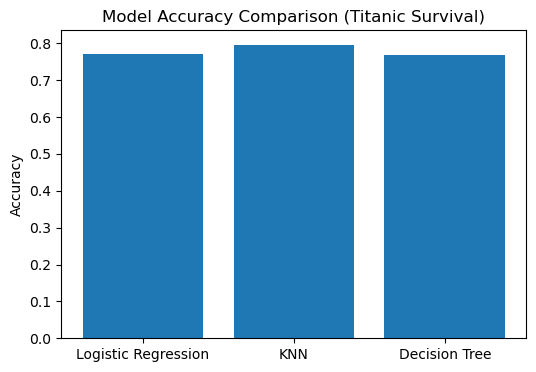

In [51]:
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [acc_lr, acc_knn, acc_dt]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison (Titanic Survival)")
plt.show()